In [1]:
#basic import
import pandas as pd
import numpy as np

#import library for data visulization
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
#read the data & keeping date as index 
rv=pd.read_csv(r"E:\uc files\GULZAR\GULZAR\TIME SERIES\RestaurantVisitors.csv",index_col="date",parse_dates=True)

In [43]:
rv1=rv

In [42]:
rv.tail(50)

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-12,Wednesday,0,na,44.0,2.0,15.0,28.0,89.0
2017-04-13,Thursday,0,na,19.0,12.0,12.0,27.0,70.0
2017-04-14,Friday,1,Good Friday,41.0,74.0,57.0,49.0,221.0
2017-04-15,Saturday,0,na,69.0,24.0,66.0,59.0,218.0
2017-04-16,Sunday,1,Easter,58.0,35.0,60.0,100.0,253.0
2017-04-17,Monday,1,Easter Monday,63.0,21.0,24.0,32.0,140.0
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0


In [106]:
#checking for null values
rv.isnull().sum()[rv.isnull().sum()>0]

rest1    39
rest2    39
rest3    39
rest4    39
total    39
dtype: int64

In [107]:
#removing null values
rv=rv.dropna()

In [47]:
rv.shape

(478, 8)

In [111]:
#Adfuller Hypthesis test to find statinarity of data
from statsmodels.tsa.stattools import adfuller
adfuller(rv.total)
#p value is less than 0.05,hence we reject the null

(-5.592496972543474,
 1.319377094694154e-06,
 18,
 459,
 {'1%': -3.4446773373329576,
  '5%': -2.8678574606780654,
  '10%': -2.5701349669405404},
 4596.809727672799)

In [112]:
#Kpss Hypthesis test to find statinarity of data
from statsmodels.tsa.stattools import kpss
kpss(rv.total)
##p value more than 0.05,hence we acceptthe null

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.20595582170555543,
 0.1,
 22,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

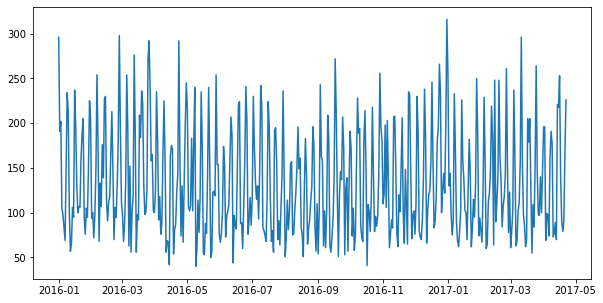

In [7]:
#checking for stationarity of data
plt.figure(figsize=(10,5))
plt.plot(rv.total)

In [10]:
index_pos=rv[rv.holiday==1].index
index_pos

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

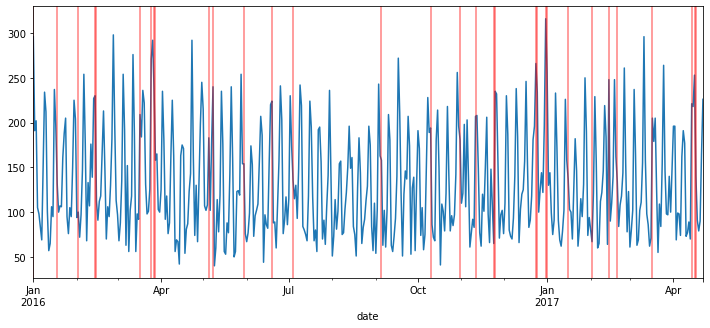

In [12]:
#checking impact of holidays on number of visitors
abc=rv.total.plot(figsize=(12,5))
for hol in index_pos:
    abc.axvline(x=hol, c="r",alpha=0.5)

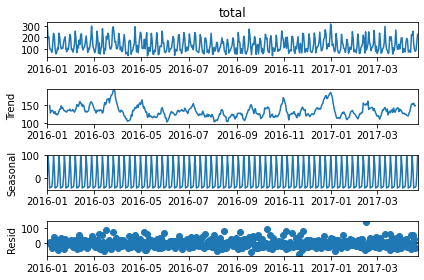

In [13]:
#checking for seasonality & trend of data
from statsmodels.tsa.seasonal import seasonal_decompose
dec_val=seasonal_decompose(rv.total)
dec_val.plot();

In [57]:
#dividing data into train & test for compararision between actual and predicted
train_rv=rv.iloc[0:450]
test_rv=rv.iloc[450:479]


In [15]:
#auto arima for best combination
import pmdarima
from pmdarima import auto_arima

auto_arima(rv["total"],seasonal=True,m=7,exogenous=rv[["holiday"]])

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [28]:
#sarimax model building on train data
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(train_rv["total"],order=(1, 0, 0),seasonal_order=(1, 0, 1, 7),exog=train_rv[["holiday"]])

result=model2.fit()

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [38]:
#prediction to compare with test data
pred_sarimax=result.predict(start=450,end=477,exog=test_rv[["holiday"]])

In [30]:
#mse
err1=test_rv.total-pred_sarimax

mse=np.mean(np.square(err1))
mse

359.1991752522273

In [21]:
#mape
mape=np.mean(np.abs(err1*100/test_rv.total))
mape

12.225858545604721

In [26]:
test_rv[test_rv.holiday==1].index

DatetimeIndex(['2017-04-14', '2017-04-16', '2017-04-17'], dtype='datetime64[ns]', name='date', freq=None)

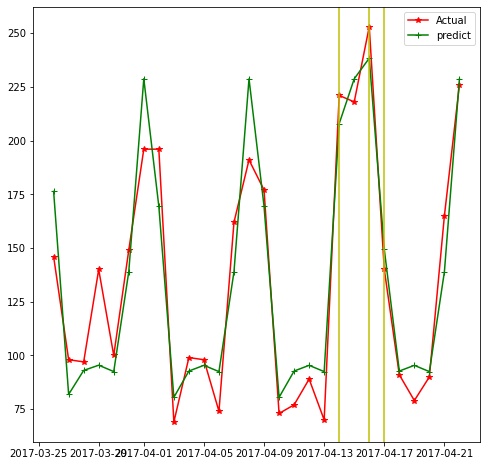

In [23]:
#comparing predicted value with actual value 
plt.figure(figsize=(8,8))
plt.plot(test_rv.total,marker="*",c="r",label="Actual")
plt.plot(pred_sarimax,marker="+",c="g",label="predict")
plt.legend()


plt.axvline(x="2017-04-14",c="y")
plt.axvline(x='2017-04-16',c="y")
plt.axvline(x='2017-04-17',c="y")

In [24]:
#comparing predicted value with actual value 
comp=pd.DataFrame()
comp["actual"]=test_rv.total
comp["sarimax"]=pred_sarimax
comp

,actual,sarimax
date,,
2017-03-26,146.0,176.358361
2017-03-27,98.0,81.861042
2017-03-28,97.0,93.017000
2017-03-29,140.0,95.451116
2017-03-30,100.0,92.489370
2017-03-31,149.0,138.966618
2017-04-01,196.0,228.765986
2017-04-02,196.0,169.414600
2017-04-03,69.0,80.491287


# prediction for null values

In [54]:
#dividing data into train & test 
train_rv1=rv1.iloc[0:478]
test_rv1=rv1.iloc[478:518]


In [95]:
#sarimax model building on train_rv1 data
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(train_rv1["total"],order=(1, 0, 0),seasonal_order=(1, 0, 1, 7),exog=train_rv1[["holiday"]])

result=model.fit()

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [90]:
rv1.shape

(517, 8)

In [96]:
#prediction on test_rv1
pred_sarimax=result.predict(start=478,end=516,exog=test_rv1[["holiday"]])
pred_sarimax

2017-04-23    170.592126
2017-04-24     79.710611
2017-04-25     92.271830
2017-04-26     95.976991
2017-04-27     91.490798
2017-04-28    141.823556
2017-04-29    225.340497
2017-04-30    170.468630
2017-05-01     79.686423
2017-05-02     92.264164
2017-05-03     95.972216
2017-05-04     91.486761
2017-05-05    211.681773
2017-05-06    225.330843
2017-05-07    170.461330
2017-05-08     79.683010
2017-05-09     92.260213
2017-05-10     95.968106
2017-05-11     91.482843
2017-05-12    141.811388
2017-05-13    225.321193
2017-05-14    240.318341
2017-05-15     79.679598
2017-05-16     92.256262
2017-05-17     95.963997
2017-05-18     91.478925
2017-05-19    141.805315
2017-05-20    225.311544
2017-05-21    170.446730
2017-05-22     79.676185
2017-05-23     92.252311
2017-05-24     95.959887
2017-05-25     91.475008
2017-05-26    141.799242
2017-05-27    225.301895
2017-05-28    170.439431
2017-05-29    149.537085
2017-05-30     92.248360
2017-05-31     95.955778
Freq: D, Name: predicted_